In [1]:
# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Configuración de la reresentación
xint = [-10, 10] #Intervalo de representación de la coordenada generalizada
pint = [-10, 10] #Intervalo de representación del momento generalizado
puntos_iniciales = 50 # Número de puntos iniciales en los ejes
puntos_tiempo = 1000 # Puntos ploteados en la evolución temporal
tmax = 3 #Tiempo máximo de cálculo del movimiento
tamaño_figura = None #Array [.,.] con las dimensiones de la figura (None -> Por defecto)

In [3]:
# Ecuaciones del movimiento del sistema
#    - Función que toma como entrada x, p y t
#      y devuelve un array las derivadas temporales de las
#      coordenadas y momentos generalizados del espacio de fases
def motion(t, coordinates):
    A, B, m = 1, 1, 1
    xdot = coordinates[1]/m
    pdot = -2*A*coordinates[0]-4*B*coordinates[0]**3
    return [xdot, pdot]

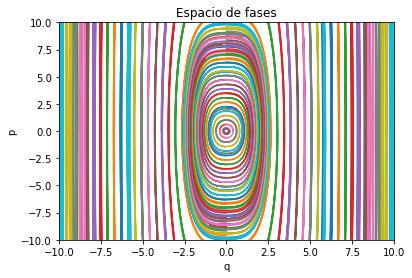

In [4]:
# Representación
plot = plt.figure(figsize=tamaño_figura) if tamaño_figura else plt.figure()
splot = plt.subplot(111)
plt.title("Espacio de fases")
plt.xlabel("q")
plt.ylabel("p")
plt.xlim(xint)
plt.ylim(pint)

initialsx = [[x, 0] for x in np.linspace(xint[0], xint[1], puntos_iniciales)]
initialsp = [[0, p] for p in np.linspace(pint[0], pint[1], puntos_iniciales)]
initials = initialsx + initialsp
sols = []
for point in initials:
    sol = solve_ivp(motion, t_span=[0, tmax], y0 = point, t_eval=np.linspace(0, tmax, puntos_tiempo))
    sols.append(sol.y)
for sol in sols:
    plt.plot(sol[0], sol[1])